## **Question 1**

In [35]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
!pip install pandas
!pip install torch-summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.2.0+cu92 (from versions: 1.7.1, 1.7.1+cpu, 1.7.1+cu101, 1.7.1+cu110, 1.7.1+cu92, 1.7.1+rocm3.7, 1.7.1+rocm3.8, 1.8.0, 1.8.0+cpu, 1.8.0+cu101, 1.8.0+cu111, 1.8.0+rocm3.10, 1.8.0+rocm4.0.1, 1.8.1, 1.8.1+cpu, 1.8.1+cu101, 1.8.1+cu102, 1.8.1+cu111, 1.8.1+rocm3.10, 1.8.1+rocm4.0.1, 1.9.0, 1.9.0+cpu, 1.9.0+cu102, 1.9.0+cu111, 1.9.0+rocm4.0.1, 1.9.0+rocm4.1, 1.9.0+rocm4.2, 1.9.1, 1.9.1+cpu, 1.9.1+cu102, 1.9.1+cu111, 1.9.1+rocm4.0.1, 1.9.1+rocm4.1, 1.9.1+rocm4.2, 1.10.0, 1.10.0+cpu, 1.10.0+cu102, 1.10.0+cu111, 1.10.0+cu113, 1.10.0+rocm4.0.1, 1.10.0+rocm4.1, 1.10.0+rocm4.2, 1.10.1, 1.10.1+cpu, 1.10.1+cu102, 1.10.1+cu111, 1.10.1+cu113, 1.10.1+rocm4.0.1, 1.10.1+rocm4.1, 1.10.1+rocm4.2, 1.10.2, 1.10.2+cpu, 1.10.2+cu102, 1.10.2+cu111, 1.10.2+cu113, 1.10.2+rocm4.0

In [36]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from torchsummary import summary

In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [38]:
import warnings

def fxn():
  warnings.warn('deprecated', DeprecationWarning)

with warnings.catch_warnings():
  warnings.simplefilter('ignore')
  fxn()

In [39]:
data= pd.read_csv('/content/drive/MyDrive/prml/lab-9/abalone.data', names=['Sex', 'Length', 'Diameter', 'Heoght', 'Whole Weight', 'Shuckled Weight', 'Viscera Weight', 'Shell Weight', 'Rings'])
print(data.head())     

  Sex  Length  Diameter  Heoght  Whole Weight  Shuckled Weight  \
0   M   0.455     0.365   0.095        0.5140           0.2245   
1   M   0.350     0.265   0.090        0.2255           0.0995   
2   F   0.530     0.420   0.135        0.6770           0.2565   
3   M   0.440     0.365   0.125        0.5160           0.2155   
4   I   0.330     0.255   0.080        0.2050           0.0895   

   Viscera Weight  Shell Weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [40]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4177 non-null   object 
 1   Length           4177 non-null   float64
 2   Diameter         4177 non-null   float64
 3   Heoght           4177 non-null   float64
 4   Whole Weight     4177 non-null   float64
 5   Shuckled Weight  4177 non-null   float64
 6   Viscera Weight   4177 non-null   float64
 7   Shell Weight     4177 non-null   float64
 8   Rings            4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


In [41]:
print( data['Rings'].value_counts())

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

lb_enc= LabelEncoder()
scaler= MinMaxScaler()

drop=[]

for column in data:
  index=0
  for value in data[column]:
    if data[column].dtype=='object' and value.isnumeric()==True :
      drop.append(index)
    if data[column].dtype!='object' and isinstance(value, int)==False and isinstance(value, float)==False:
      drop.append(index)
    index+=1

data= data.drop( drop)

In [43]:
'''label encoding object columns;'''
data['Sex']= lb_enc.fit_transform( data['Sex'])

scaling_feat=[]
for columns in data:
  if columns!='Sex':
    scaling_feat.append( columns)

data[ scaling_feat]= scaler.fit_transform( data[scaling_feat])

In [44]:
'''further we binerize our data as the lest data is in that format'''

rings= np.array( data['Rings'])
from sklearn.preprocessing import KBinsDiscretizer
transform= KBinsDiscretizer( n_bins=3, encode= 'ordinal', strategy= 'uniform')
rings= np.ravel(transform.fit_transform( rings.reshape( len(rings), 1)))

data['Rings']= rings

In [45]:
'''This completes our preprocessing and now we can split the data'''
from sklearn.model_selection import train_test_split
train, test= train_test_split( data, test_size=0.3, random_state= 42)

X_train, y_train= train.iloc[:, :-1].values, train.iloc[:, -1].values
X_test, y_test= test.iloc[:, :-1].values, test.iloc[:, -1].values 

In [46]:
def acc( batch_size, rings, logit):
  corrects= (torn.max( logit, 1)[1].view( target.size()).data== taregt.data).sum()
  acc= 100.0*corrects/batch_size
  return acc
  

In [47]:
'''lets make our model'''

class Network(torch.nn.Module):
    def __init__(self, num_inputs, size_hidden_1, size_hidden_2, n_output):
        super(Network, self).__init__()
        self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)  
        self.activation_1 = torch.nn.Tanh()
        self.hidden_layer_2 = torch.nn.Linear(num_inputs, size_hidden_2)  
        self.activation_2 = torch.nn.Tanh() 
        
        self.output_layer = torch.nn.Linear(size_hidden_1, n_output) 
        self.output_act = torch.nn.Sigmoid()

    def forward(self, x):
        x1 = self.activation_1(self.hidden_layer_1(x)) 
        x2= self.activation_2(self.hidden_layer_2(x))      
        x3 = torch.add(x2,x1)
        res = self.output_act(self.output_layer(x3))    
        return res



In [48]:
batch_size = 32
num_epochs = 500
size_hidden_1 = 500
size_hidden_2 = 500
learning_rate = 0.05
num_classes = 5
batch_count = len(X_train)//batch_size
cols = X_train.shape[1] 

In [49]:
net = Network(cols, size_hidden_1, size_hidden_2, num_classes)

optim_ = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

In [50]:
def get_accuracy(logit, target, batch_size):
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [51]:

losess = []
for epoch in range(500):
    X_train,y_train = shuffle(X_train, y_train)
    train_accuracy = 0.0
    run_time_loss = 0.0
    for i in range(batch_count):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.LongTensor(y_train[start:end]))
        optim_.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optim_.step()
        run_time_loss += loss.item()
        acc = get_accuracy(outputs, labels, batch_size)
        train_accuracy += acc
    losess.append(run_time_loss/(i+1)) 
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch+1, run_time_loss / (i+1), train_accuracy/(i+1)))  
    run_time_loss = 0.0

Epoch: 1 | Loss: 1.1935 | Train Accuracy: 64.29
Epoch: 2 | Loss: 1.1445 | Train Accuracy: 64.66
Epoch: 3 | Loss: 1.1357 | Train Accuracy: 64.70
Epoch: 4 | Loss: 1.1301 | Train Accuracy: 64.73
Epoch: 5 | Loss: 1.1263 | Train Accuracy: 64.56
Epoch: 6 | Loss: 1.1227 | Train Accuracy: 64.70
Epoch: 7 | Loss: 1.1209 | Train Accuracy: 64.73
Epoch: 8 | Loss: 1.1191 | Train Accuracy: 64.80
Epoch: 9 | Loss: 1.1176 | Train Accuracy: 64.97
Epoch: 10 | Loss: 1.1164 | Train Accuracy: 65.11
Epoch: 11 | Loss: 1.1156 | Train Accuracy: 65.08
Epoch: 12 | Loss: 1.1149 | Train Accuracy: 65.08
Epoch: 13 | Loss: 1.1140 | Train Accuracy: 65.25
Epoch: 14 | Loss: 1.1135 | Train Accuracy: 65.38
Epoch: 15 | Loss: 1.1128 | Train Accuracy: 65.52
Epoch: 16 | Loss: 1.1124 | Train Accuracy: 65.56
Epoch: 17 | Loss: 1.1121 | Train Accuracy: 65.49
Epoch: 18 | Loss: 1.1118 | Train Accuracy: 65.80
Epoch: 19 | Loss: 1.1110 | Train Accuracy: 65.93
Epoch: 20 | Loss: 1.1109 | Train Accuracy: 65.90
Epoch: 21 | Loss: 1.1102 | Tr

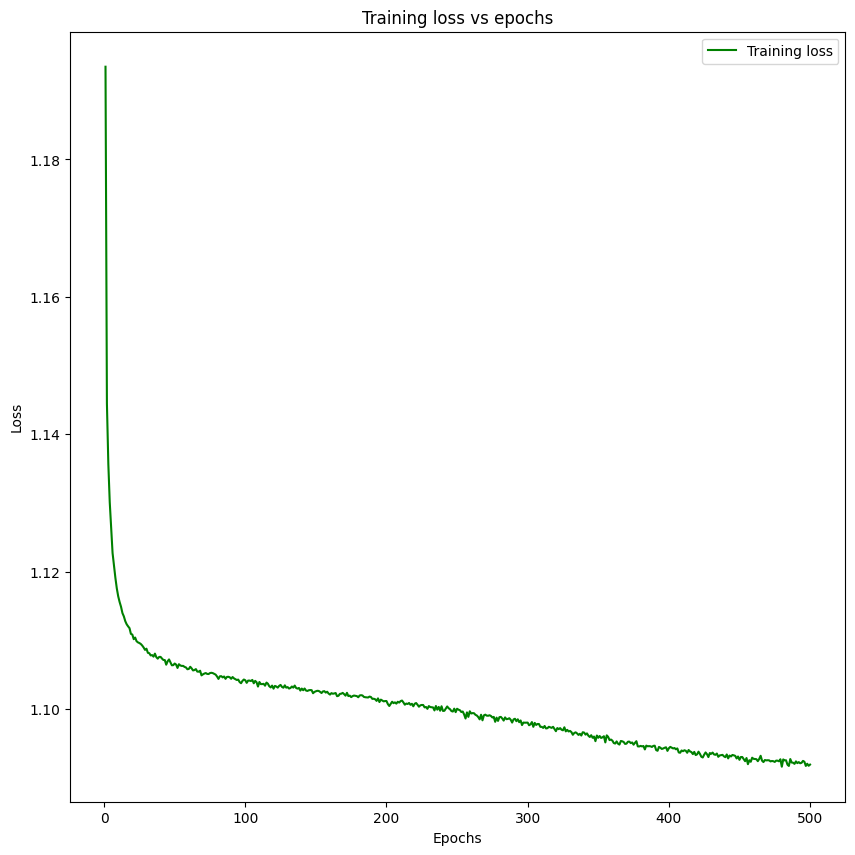

In [52]:
epochs_ = range(1,501)
plt.figure(figsize=(10,10)) 
plt.plot(epochs_, losess, 'g', label='Training loss')
plt.title('Training loss vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()